## Importing Important Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns


## Import Data set

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv')

# Dataset description

In [4]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


In [6]:
df.drop(columns=['Cabin'], inplace=True)

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


# Filling Null Value


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Performing Outlier

In [10]:
num_cols = ['Age']

for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

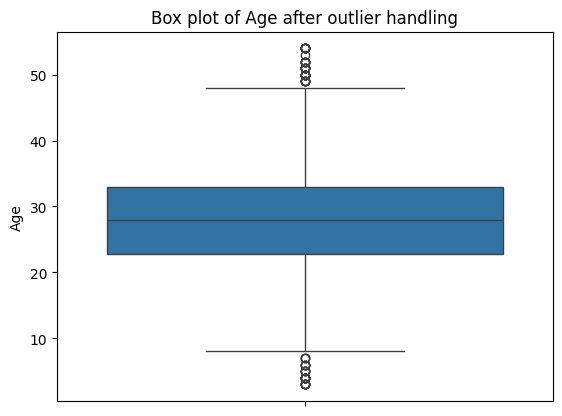

In [11]:
sns.boxplot(data=df['Age'])
plt.title('Box plot of Age after outlier handling')
plt.show()

# Detecting Duplicate Data Values

In [12]:
# Backup the original data
df_copy = df.copy()

In [13]:
df.duplicated(subset=['PassengerId']).sum()

np.int64(18)

# Normalize Sex column to M and F

In [30]:
df['Sex'] = (
    df['Sex']
    .str.strip()
    .str.lower()
    .replace({'male': 'M', 'female': 'F'})
)


# Normalize Embarked column

In [32]:
df['Embarked'] = (
    df['Embarked']
    .str.strip()
    .str.lower()
    .replace({'southampton': 'Southampton', 's': 'Southampton'})
)


In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,c
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
904,245,0,3,"Attalah, Mr. Sleiman",M,NaN,0,0,2694,NaN,NaN,c
905,345,0,2,"Fox, Mr. Stanley Hubert",M,36.0,0,0,229236,13.0000,NaN,Southampton
906,854,1,1,"Lines, Miss. Mary Conover",F,16.0,0,1,PC 17592,39.4000,D28,Southampton
907,622,1,1,"Kimball, Mr. Edwin Nelson Jr",M,NaN,1,0,11753,NaN,D19,Southampton
